In [ ]:
#Carregandos bibliotecas importantes para a atividade
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline
#plt.figure(figsize=(largura, altura))
plt.rcParams["figure.figsize"] = (12, 8)

import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.float_format', lambda x: '%.3f' % x)

import io, os

import missingno as miss

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

from pprint import pprint
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.model_selection import train_test_split, cross_val_predict, KFold,cross_val_score

from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,ConfusionMatrixDisplay, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score

from pandas.api.types import is_datetime64_any_dtype as is_datetime
from pandas.api.types import is_categorical_dtype

from google.colab import drive

In [ ]:
#Montando o drive para carregar o arquivo
GOOGLE_COLAB = "google.colab" in str(get_ipython())

if GOOGLE_COLAB:
    from google.colab import drive
    drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
drive = '/content/drive/MyDrive/Mestrado/ids_datasets/UNSW_NB15/dataset/'

In [ ]:
csvs = os.listdir(drive)
csvs

['UNSW_NB15_training-set.csv',
 'UNSW_NB15_testing-set.csv',
 'NUSW-NB15_features.csv',
 'UNSW-NB15_1.csv',
 'UNSW-NB15_2.csv',
 'UNSW-NB15_3.csv',
 'UNSW-NB15_4.csv',
 'UNSW-NB15_LIST_EVENTS.csv',
 'UNSW_NB15.csv',
 'dataset_UNSW_NB15']

In [ ]:
df_train = pd.read_csv(drive+"UNSW_NB15_training-set.csv")
df_test = pd.read_csv(drive+"UNSW_NB15_testing-set.csv")
list_events = pd.read_csv(drive+"UNSW-NB15_LIST_EVENTS.csv")
features = pd.read_csv(drive+"NUSW-NB15_features.csv", encoding='cp1252')

In [ ]:
print(df_train.shape, df_test.shape)
if df_train.shape[0]<100000:
    print("Train test sets are reversed. Fixing them.")
    train, test = test, train

(175341, 45) (82332, 45)


In [ ]:
# Extrair nomes das colunas de cada DataFrame
colunas_df1 = set(df_train.columns)
colunas_df2 = set(df_test.columns)

# Verificar se os nomes das colunas são os mesmos
if colunas_df1 == colunas_df2:
    print("Todos os arquivos têm os mesmos nomes de colunas.")
else:
    print("Os arquivos têm nomes de colunas diferentes.")

    # Mostrar diferenças
    print("Colunas em arquivo1 e não em arquivo2:", colunas_df1 - colunas_df2)

Todos os arquivos têm os mesmos nomes de colunas.


In [ ]:
# all(colunas_df1.columns == colunas_df2.columns)

AttributeError: 'set' object has no attribute 'columns'

In [ ]:
df = pd.concat([df_train, df_test], ignore_index=True)
df.shape

(257673, 45)

In [ ]:
df.drop(['id'], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257673 entries, 0 to 257672
Data columns (total 44 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dur                257673 non-null  float64
 1   proto              257673 non-null  object 
 2   service            257673 non-null  object 
 3   state              257673 non-null  object 
 4   spkts              257673 non-null  int64  
 5   dpkts              257673 non-null  int64  
 6   sbytes             257673 non-null  int64  
 7   dbytes             257673 non-null  int64  
 8   rate               257673 non-null  float64
 9   sttl               257673 non-null  int64  
 10  dttl               257673 non-null  int64  
 11  sload              257673 non-null  float64
 12  dload              257673 non-null  float64
 13  sloss              257673 non-null  int64  
 14  dloss              257673 non-null  int64  
 15  sinpkt             257673 non-null  float64
 16  di

In [ ]:
df.shape

(257673, 44)

In [ ]:
features.head(features.shape[0])

,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol
5,6,state,nominal,Indicates to the state and its dependent proto...
6,7,dur,Float,Record total duration
7,8,sbytes,Integer,Source to destination transaction bytes
8,9,dbytes,Integer,Destination to source transaction bytes
9,10,sttl,Integer,Source to destination time to live value


#Análise Estatística

In [ ]:
df['label'].unique()

array([0, 1])

In [ ]:
normal_count = anomaly_count = 0
for k in df['label']:
  if k == 0:
    normal_count +=1
  else:
    anomaly_count +=1
print(f"normal_count: {normal_count}")
print(f"anomaly_count: {anomaly_count}")

normal_count: 93000
anomaly_count: 164673


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
dur,257673.000,1.247,5.974,0.000,0.000,0.004,0.686,60.000
spkts,257673.000,19.777,135.947,1.000,2.000,4.000,12.000,10646.000
dpkts,257673.000,18.515,111.986,0.000,0.000,2.000,10.000,11018.000
sbytes,257673.000,8572.952,173773.881,24.000,114.000,528.000,1362.000,14355774.000
dbytes,257673.000,14387.288,146199.282,0.000,0.000,178.000,1064.000,14657531.000
rate,257673.000,91253.912,160344.637,0.000,30.789,2955.665,125000.000,1000000.003
sttl,257673.000,180.001,102.488,0.000,62.000,254.000,254.000,255.000
dttl,257673.000,84.755,112.762,0.000,0.000,29.000,252.000,254.000
sload,257673.000,70608691.228,185731252.842,0.000,12318.005,743942.312,80000000.000,5988000256.000
dload,257673.000,658214.282,2412372.138,0.000,0.000,1747.441,22105.385,22422730.000


In [ ]:
print(df.duplicated().sum())

94928


In [ ]:
#remove duplicates without first occurrence
df.drop_duplicates(keep='first',inplace=True)

In [ ]:
print(df.duplicated().sum())

0


# Missing Values and the Percentage of Missing Values

In [ ]:
missing_data = df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
missing_data["% of Missing Values"] = round((missing_data["Total No. of Missing Values"]/len(df))*100,2)
missing_data

,Total No. of Missing Values,% of Missing Values
dur,0,0.000
proto,0,0.000
service,0,0.000
state,0,0.000
spkts,0,0.000
dpkts,0,0.000
sbytes,0,0.000
dbytes,0,0.000
rate,0,0.000
sttl,0,0.000


In [ ]:
# Lista para armazenar nomes das colunas que estão completamente vazias
empty_cols=[]

# Itera sobre cada coluna do dataframe
for col in df.columns:
  if df[col].isnull().all():
    empty_cols.append(col)
    if len(empty_cols == []):
      df.fillna(0, inplace=True)

print(f'Colunas vazias: {empty_cols}')

Colunas vazias: []


In [ ]:
# Contar o número de NaN por coluna
nan_count_per_column = df.isna().sum()
print("Número de NaN por coluna:")
print(nan_count_per_column)

Número de NaN por coluna:
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_c

In [ ]:
df = df.dropna(axis=0, how='any')

In [ ]:
df = df.loc[:, df.nunique() > 1]

In [ ]:
df.shape

(162745, 44)

#Após pré-processamento


In [ ]:
# missing_data = df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
# missing_data["% of Missing Values"] = round((missing_data["Total No. of Missing Values"]/len(df))*100,2)
# missing_data

,Total No. of Missing Values,% of Missing Values
dur,0,0.000
proto,0,0.000
service,0,0.000
state,0,0.000
spkts,0,0.000
dpkts,0,0.000
sbytes,0,0.000
dbytes,0,0.000
rate,0,0.000
sttl,0,0.000


In [ ]:
df_label_count = df.groupby('label').size().reset_index(name='count')
df_label_count.columns = ['label', 'count']

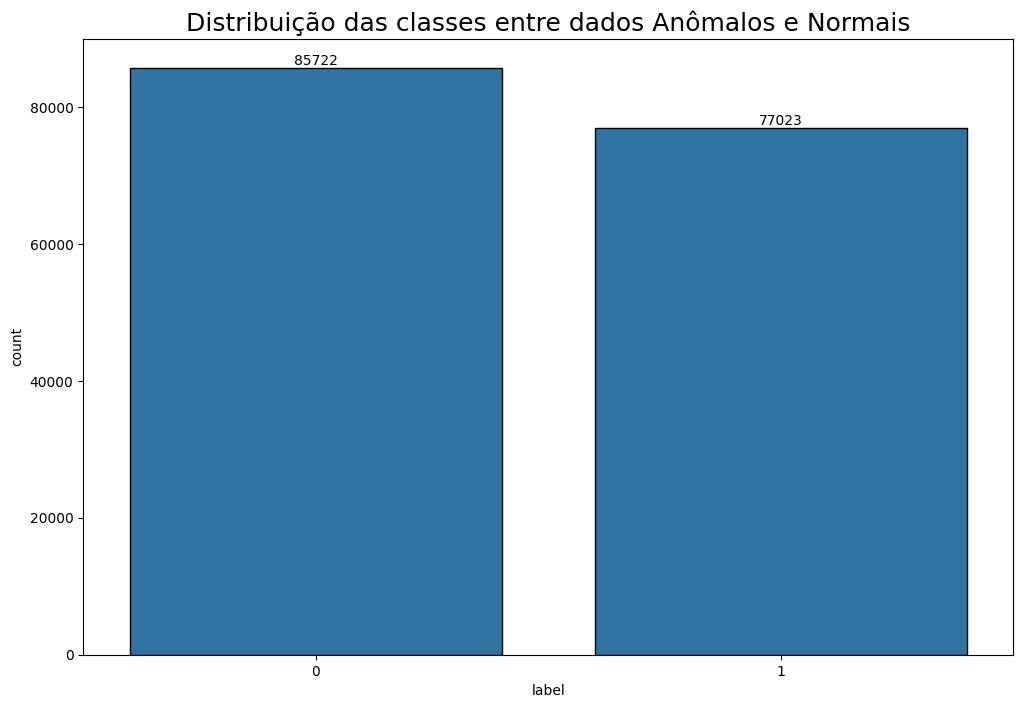

In [ ]:
ax = sns.barplot(
    data = df_label_count,
    x= 'label',
    y= 'count',
    edgecolor='black')

ax.set_title('Distribuição das classes entre dados Anômalos e Normais',
          fontdict={'fontsize':18})

for container in ax.containers:
   ax.bar_label(container)

In [ ]:
count_val0 = df_label_count[df_label_count['label'] == 0]['count'].iloc[0]
count_val1 = df_label_count[df_label_count['label'] == 1]['count'].iloc[0]

print(f'Proporção de Classes:\n')
print(f'Instâncias normais: {count_val0/len(df)*100:.2f}%')
print(f'Instâncias anômalas: {count_val1/len(df)*100:.2f}%')

Proporção de Classes:

Instâncias normais: 52.67%
Instâncias anômalas: 47.33%


# Categorias de Ataques

In [ ]:
validAttacks = df[df['label']==1]['attack_cat'].value_counts()
print(validAttacks)

attack_cat
Exploits          27434
Fuzzers           20960
Reconnaissance     9991
Generic            7599
DoS                5500
Analysis           2032
Backdoor           1880
Shellcode          1456
Worms               171
Name: count, dtype: int64


#Se tivesse que balancear o dataset - não fiz


In [ ]:
# # check data imbalance
# attackcat_counts = df['label'].value_counts()
# attackcat_counts

# from imblearn.over_sampling import SMOTE

# # Separate features and target variable
# X = final_df.drop('label', axis=1)
# y = final_df['label']

# # Initialize SMOTE
# smote = SMOTE(random_state=42)

# # Perform oversampling
# X_resampled, y_resampled = smote.fit_resample(X, y)

# # Create a new DataFrame with oversampled data
# final_df = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='label')], axis=1)

# # check data imbalance again
# attackcat_counts = final_df['label'].value_counts()
# attackcat_counts

,count
label,
0,85722
1,77023


In [ ]:
def unique_vals(df, columns):
  for col_name in columns:
    print(f"Colunas: {col_name}\n{'-'*30}")
    unique_vals = df[col_name].unique()
    len_unique_vals = len(unique_vals)
    value_counts = df[col_name].value_counts()

    print(f'Valores Unicos: {len_unique_vals}\n')
    print(f"Value Counts: {value_counts}\n{'='*40}\n")

columns = df.columns.to_list()
unique_vals(df, columns)

Colunas: dur
------------------------------
Valores Unicos: 109945

Value Counts: dur
0.000    5639
0.000    3556
0.000    3365
0.000    2716
0.000    2585
         ... 
1.948       1
0.764       1
0.724       1
0.807       1
0.917       1
Name: count, Length: 109945, dtype: int64

Colunas: proto
------------------------------
Valores Unicos: 133

Value Counts: proto
tcp      116801
udp       34927
unas       3386
ospf        965
arp         766
          ...  
argus        40
tlsp         36
ggp          35
icmp         13
rtp           1
Name: count, Length: 133, dtype: int64

Colunas: service
------------------------------
Valores Unicos: 13

Value Counts: service
-           101287
http         26065
dns          16895
smtp          6784
ftp-data      4459
ftp           3982
ssh           1499
pop3          1485
ssl             86
snmp            81
dhcp            74
irc             30
radius          18
Name: count, dtype: int64

Colunas: state
------------------------------
Valo

In [ ]:
categ_feat = df.select_dtypes(include=['object']).columns
unique_vals(df, categ_feat)

Colunas: proto
------------------------------
Valores Unicos: 133

Value Counts: proto
tcp      116801
udp       34927
unas       3386
ospf        965
arp         766
          ...  
argus        40
tlsp         36
ggp          35
icmp         13
rtp           1
Name: count, Length: 133, dtype: int64

Colunas: service
------------------------------
Valores Unicos: 13

Value Counts: service
-           101287
http         26065
dns          16895
smtp          6784
ftp-data      4459
ftp           3982
ssh           1499
pop3          1485
ssl             86
snmp            81
dhcp            74
irc             30
radius          18
Name: count, dtype: int64

Colunas: state
------------------------------
Valores Unicos: 11

Value Counts: state
FIN    111833
INT     29483
CON     19198
REQ      2129
RST        84
ECO        10
ACC         4
PAR         1
URN         1
no          1
CLO         1
Name: count, dtype: int64

Colunas: attack_cat
------------------------------
Valores Unicos:

In [ ]:
list_feat=[]
for feats in categ_feat:
  list_feat.append(feats)
  len_feat = len(list_feat)

print(f'Atributos categóricos: {list_feat}\n')
print(f'Tamanho: {len_feat}')

Atributos categóricos: ['proto', 'service', 'state', 'attack_cat']

Tamanho: 4


In [ ]:
numeric_feats = df.select_dtypes(include=['float', 'int']).columns
unique_vals(df, numeric_feats)

Colunas: dur
------------------------------
Valores Unicos: 109945

Value Counts: dur
0.000    5639
0.000    3556
0.000    3365
0.000    2716
0.000    2585
         ... 
1.948       1
0.764       1
0.724       1
0.807       1
0.917       1
Name: count, Length: 109945, dtype: int64

Colunas: spkts
------------------------------
Valores Unicos: 646

Value Counts: spkts
10      41537
2       39717
12       9777
14       7526
16       5814
        ...  
2446        1
4370        1
4360        1
4174        1
1142        1
Name: count, Length: 646, dtype: int64

Colunas: dpkts
------------------------------
Valores Unicos: 627

Value Counts: dpkts
0       31627
8       25177
6       18928
2       13978
10       9795
        ...  
2668        1
784         1
1349        1
750         1
1324        1
Name: count, Length: 627, dtype: int64

Colunas: sbytes
------------------------------
Valores Unicos: 9382

Value Counts: sbytes
200       8093
146       6956
114       6091
564       4768
534  

In [ ]:
list_feat_num=[]
for feats in numeric_feats:
  list_feat_num.append(feats)
  len_feat_num = len(list_feat_num)

print(f'Atributos numéricos: {list_feat_num}\n')
print(f'Tamanho: {len_feat_num}')

Atributos numéricos: ['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'label']

Tamanho: 40


In [ ]:
def reduce_mem_usage(df, use_float16=False):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        if is_datetime(df[col]) or is_categorical_dtype(df[col]):
            # skip datetime type or categorical type
            continue
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if use_float16 and c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('object')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

In [ ]:
df = reduce_mem_usage(df)

Memory usage of dataframe is 55.87 MB
Memory usage after optimization is: 22.82 MB
Decreased by 59.2%


In [ ]:
df['attack_cat'].unique()

array(['Normal', 'Backdoor', 'Analysis', 'Fuzzers', 'Shellcode',
       'Reconnaissance', 'Exploits', 'DoS', 'Worms', 'Generic'],
      dtype=object)

In [ ]:
df.drop(['attack_cat'], axis=1, inplace=True)

#Label Encoder

In [ ]:
df[['proto', 'service', 'state']]

,proto,service,state
0,tcp,-,FIN
1,tcp,-,FIN
2,tcp,-,FIN
3,tcp,ftp,FIN
4,tcp,-,FIN
...,...,...,...
257658,tcp,-,FIN
257660,tcp,-,FIN
257664,tcp,-,FIN
257668,udp,-,INT


In [ ]:
df.describe(include="O").T

,count,unique,top,freq
proto,162745,133,tcp,116801
service,162745,13,-,101287
state,162745,11,FIN,111833


#Handling is_ftp_login

In [ ]:
def convert_to_binary(df, column):
    df[column] = (df[column] > 0).astype(int)
    return df

In [ ]:
column = 'is_ftp_login'
convert_to_binary(df, column)

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
0,0.121,tcp,-,FIN,6,4,258,172,74.087,252,...,1,1,1,0,0,0,1,1,0,0
1,0.650,tcp,-,FIN,14,38,734,42014,78.473,62,...,1,1,2,0,0,0,1,6,0,0
2,1.623,tcp,-,FIN,8,16,364,13186,14.170,62,...,1,1,3,0,0,0,2,6,0,0
3,1.682,tcp,ftp,FIN,12,12,628,770,13.677,62,...,1,1,3,1,1,0,2,1,0,0
4,0.449,tcp,-,FIN,10,6,534,268,33.374,254,...,2,1,40,0,0,0,2,39,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257658,0.947,tcp,-,FIN,10,6,588,268,15.839,254,...,1,1,4,0,0,0,1,4,0,0
257660,0.812,tcp,-,FIN,10,6,588,268,18.475,254,...,1,1,4,0,0,0,1,4,0,0
257664,5.167,tcp,-,FIN,108,24,138067,1042,25.351,254,...,1,1,1,0,0,0,1,3,0,0
257668,0.000,udp,-,INT,2,0,104,0,200000.000,254,...,1,1,2,0,0,0,2,1,0,0


In [ ]:
df['is_ftp_login'].unique()

array([0, 1])

In [ ]:
le=preprocessing.LabelEncoder()
clm = ['proto', 'service', 'state']
for x in clm:
    df[x]=le.fit_transform(df[x])

#checking Highly Correlated Features

In [ ]:
df_corr = df

In [ ]:
corr_matrix = df_corr.corr()

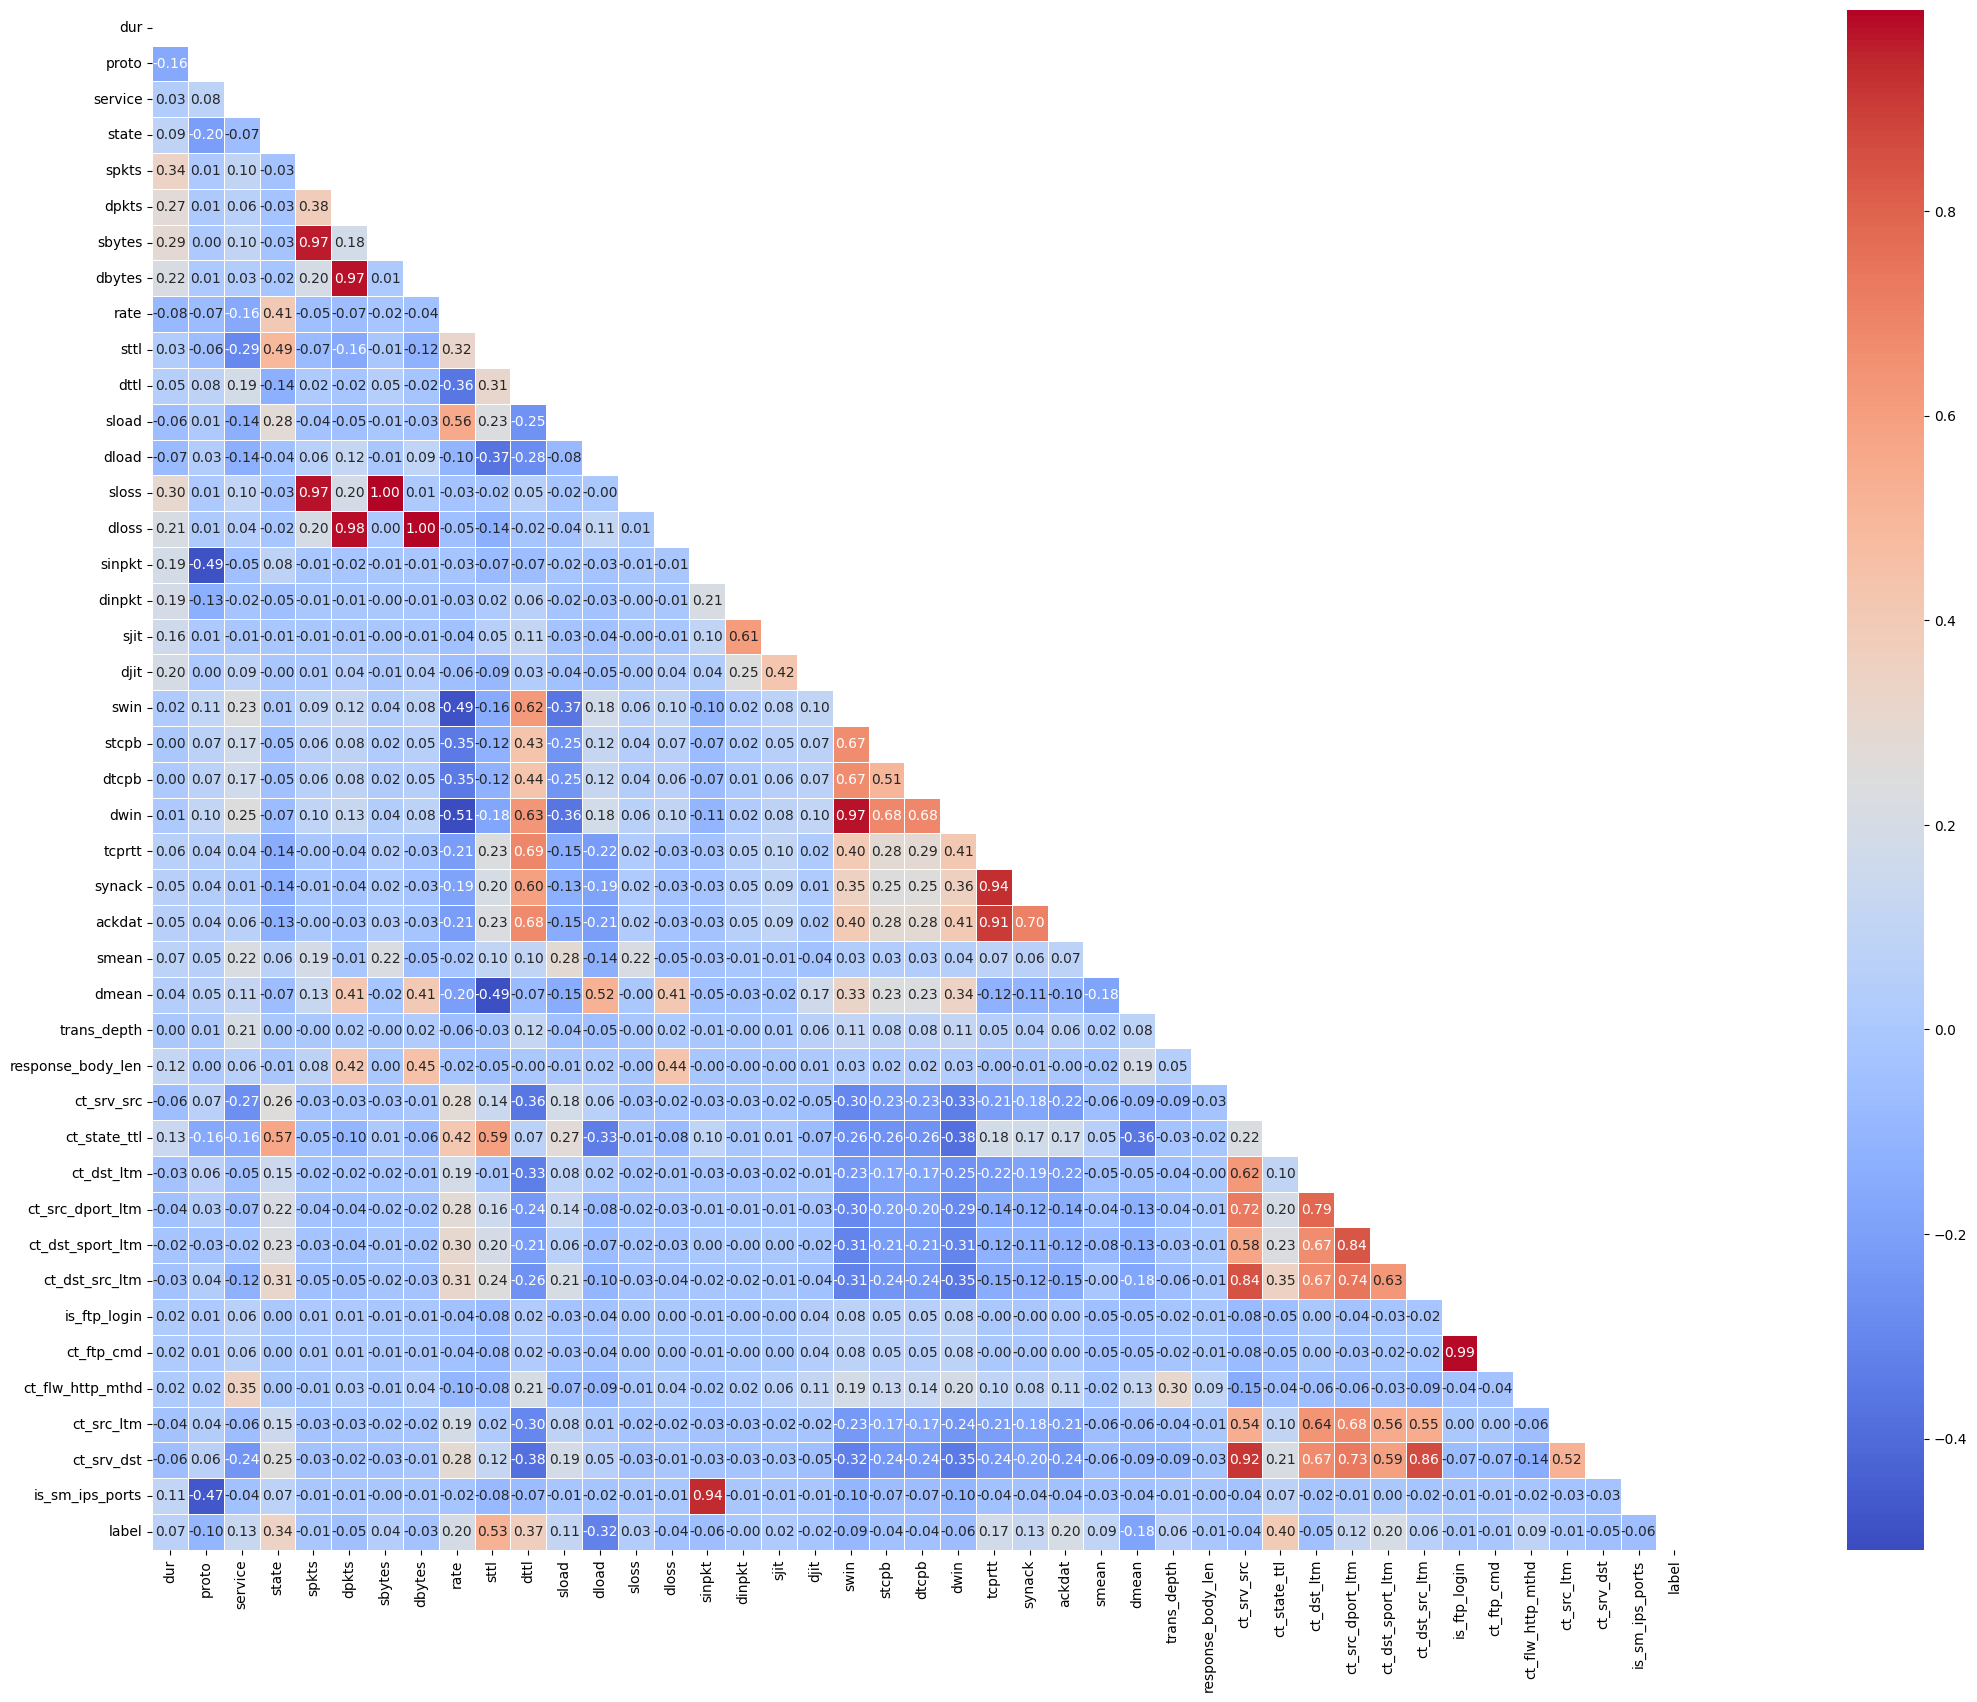

In [ ]:
plt.figure(figsize=(40, 20))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix,
            annot=True,
            mask=mask,
            linewidth=.5,
            fmt="0.2f",
            cmap='coolwarm',
            square=True)
plt.show()

In [ ]:
# Calculate the correlation matrix
corr_matrix = df_corr.corr()

# Create a mask to identify the features with a correlation coefficient greater than or equal to 0.75
high_correlation_mask = corr_matrix >= 0.75

# Identify and list the highly correlated features
highly_correlated_features = []

for feature in high_correlation_mask.columns:
    correlated_with = high_correlation_mask.index[high_correlation_mask[feature]].tolist()
    for correlated_feature in correlated_with:
        if feature != correlated_feature and (correlated_feature, feature) not in highly_correlated_features:
            highly_correlated_features.append((feature, correlated_feature))

# Print the highly correlated features
print("Highly correlated features:")
for feature1, feature2 in highly_correlated_features:
    print(f"{feature1} and {feature2}")

Highly correlated features:
spkts and sbytes
spkts and sloss
dpkts and dbytes
dpkts and dloss
sbytes and sloss
dbytes and dloss
sinpkt and is_sm_ips_ports
swin and dwin
tcprtt and synack
tcprtt and ackdat
ct_srv_src and ct_dst_src_ltm
ct_srv_src and ct_srv_dst
ct_dst_ltm and ct_src_dport_ltm
ct_src_dport_ltm and ct_dst_sport_ltm
ct_dst_src_ltm and ct_srv_dst
is_ftp_login and ct_ftp_cmd


In [ ]:
# Create a set of features to drop
features_to_drop = set()

# Iterate over the highly correlated features and add one of each pair to the drop list
for feature1, feature2 in highly_correlated_features:
    if feature1 not in features_to_drop and feature2 not in features_to_drop:
        features_to_drop.add(feature2)  # You can choose feature1 or feature2 to drop

In [ ]:
features_to_drop

{'ackdat',
 'ct_dst_src_ltm',
 'ct_ftp_cmd',
 'ct_src_dport_ltm',
 'ct_srv_dst',
 'dbytes',
 'dloss',
 'dwin',
 'is_sm_ips_ports',
 'sbytes',
 'sloss',
 'synack'}

In [ ]:
# # Select the relevant columns
# columns = ['ackdat', 'ct_dst_src_ltm', 'ct_ftp_cmd', 'ct_src_dport_ltm', 'ct_srv_dst',
#            'dbytes', 'dloss', 'dwin', 'is_sm_ips_ports', 'sbytes', 'sloss', 'synack']

# df_high_corr = pd.DataFrame(columns=columns)

In [ ]:
# Drop the features from the DataFrame
df= df.drop(columns=features_to_drop)

# Print the remaining features
print("Remaining features after dropping highly correlated ones:")
print(df.columns)

Remaining features after dropping highly correlated ones:
Index(['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'rate', 'sttl',
       'dttl', 'sload', 'dload', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin',
       'stcpb', 'dtcpb', 'tcprtt', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_dst_sport_ltm', 'is_ftp_login', 'ct_flw_http_mthd', 'ct_src_ltm',
       'label'],
      dtype='object')


In [ ]:
len(df.columns)

31

#Best Features



In [ ]:
X = df.drop(["label"], axis=1)
y = df["label"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
train_index = X_train.columns
train_index

Index(['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'rate', 'sttl',
       'dttl', 'sload', 'dload', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin',
       'stcpb', 'dtcpb', 'tcprtt', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_dst_sport_ltm', 'is_ftp_login', 'ct_flw_http_mthd', 'ct_src_ltm'],
      dtype='object')

mutual_info_regression is a function from scikit-learn used to estimate the mutual information (MI) between input features and a continuous target variable. It helps determine how much information a feature provides about the target, making it useful for feature selection in regression tasks.

In [ ]:
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = train_index
mutual_info.sort_values(ascending=False)

,0
ct_state_ttl,0.322
sttl,0.320
dttl,0.314
smean,0.270
dmean,0.269
rate,0.247
dinpkt,0.247
tcprtt,0.236
dur,0.229
sload,0.225


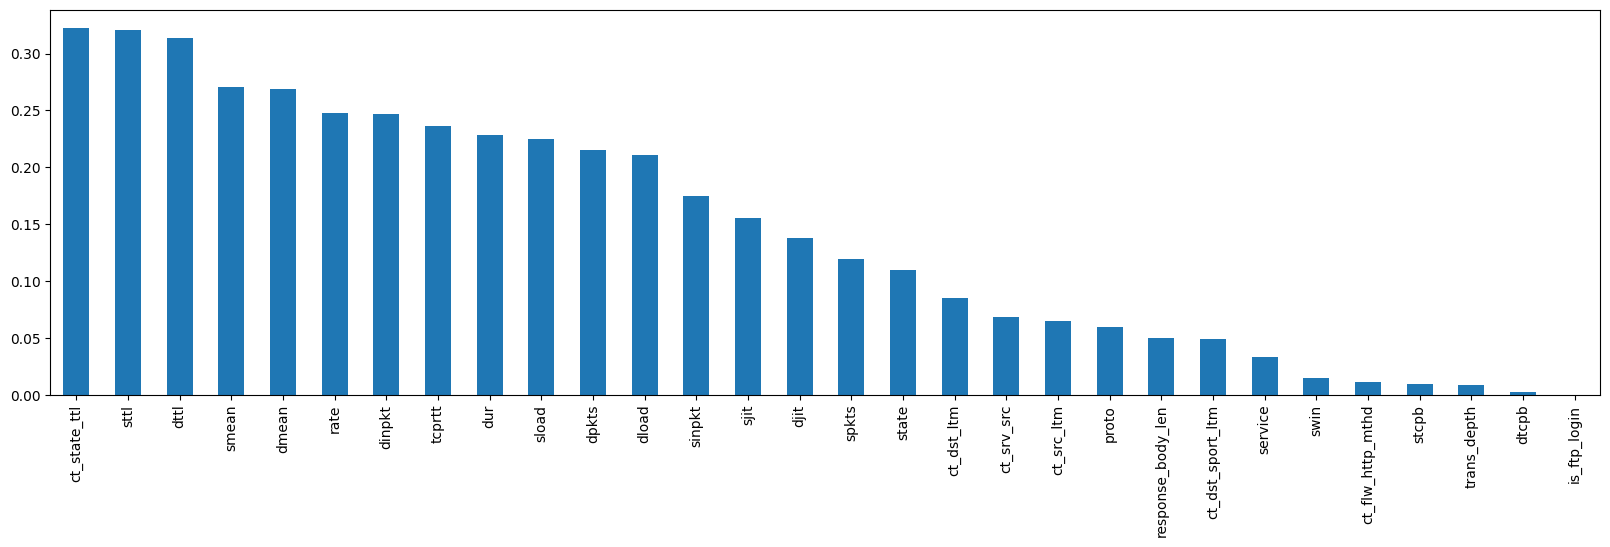

In [ ]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 5));

In [ ]:
mutual_info_sorted_features = mutual_info.sort_values(ascending=False).index.tolist()
print(mutual_info_sorted_features)

['ct_state_ttl', 'sttl', 'dttl', 'smean', 'dmean', 'rate', 'dinpkt', 'tcprtt', 'dur', 'sload', 'dpkts', 'dload', 'sinpkt', 'sjit', 'djit', 'spkts', 'state', 'ct_dst_ltm', 'ct_srv_src', 'ct_src_ltm', 'proto', 'response_body_len', 'ct_dst_sport_ltm', 'service', 'swin', 'ct_flw_http_mthd', 'stcpb', 'trans_depth', 'dtcpb', 'is_ftp_login']


#DF com as 20 melhores features do mutual_info incluindo label



In [ ]:
# mutual_info = ['ct_state_ttl', 'sttl', 'dttl', 'smean', 'dmean', 'rate', 'dinpkt', 'tcprtt', 'dur', 'sload', 'dpkts', 'dload', 'sinpkt', 'sjit', 'djit', 'spkts', 'state', 'ct_dst_ltm', 'ct_srv_src', 'ct_src_ltm', 'proto', 'response_body_len', 'ct_dst_sport_ltm', 'service', 'swin', 'ct_flw_http_mthd', 'stcpb', 'trans_depth', 'dtcpb', 'is_ftp_login', 'label']

In [ ]:
mutual_info = ['ct_state_ttl', 'sttl', 'dttl', 'smean', 'dmean', 'rate', 'dinpkt', 'tcprtt', 'dur', 'sload', 'dpkts', 'dload', 'sinpkt', 'sjit', 'djit', 'spkts', 'state', 'ct_dst_ltm', 'ct_srv_src', 'ct_src_ltm', 'label']

In [ ]:
df = df[mutual_info]

In [ ]:
len(df)

162745

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162745 entries, 0 to 257669
Data columns (total 21 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ct_state_ttl  162745 non-null  int8   
 1   sttl          162745 non-null  int16  
 2   dttl          162745 non-null  int16  
 3   smean         162745 non-null  int16  
 4   dmean         162745 non-null  int16  
 5   rate          162745 non-null  float32
 6   dinpkt        162745 non-null  float32
 7   tcprtt        162745 non-null  float32
 8   dur           162745 non-null  float32
 9   sload         162745 non-null  float32
 10  dpkts         162745 non-null  int16  
 11  dload         162745 non-null  float32
 12  sinpkt        162745 non-null  float32
 13  sjit          162745 non-null  float32
 14  djit          162745 non-null  float32
 15  spkts         162745 non-null  int16  
 16  state         162745 non-null  int64  
 17  ct_dst_ltm    162745 non-null  int8   
 18  ct_srv_sr

In [ ]:
# Select_features = SelectKBest(mutual_info_classif, k=20)
# Select_features.fit(X_train, y_train)
# train_index[Select_features.get_support()]

# select_k_best_sorted_features = train_index[Select_features.get_support()]
# select_k_best_sorted_features

Index(['dur', 'proto', 'state', 'spkts', 'dpkts', 'rate', 'sttl', 'dttl',
       'sload', 'dload', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'tcprtt', 'smean',
       'dmean', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm'],
      dtype='object')

In [ ]:
# select_kbest = ['dur', 'proto', 'state', 'spkts', 'dpkts', 'rate', 'sttl', 'dttl',
#        'sload', 'dload', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'tcprtt', 'smean',
#        'dmean', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'label']

In [ ]:
# len(select_kbest)

21

#DF com as 20 melhores features do kbest incluindo label

In [ ]:
# df_kbest = df[select_kbest]

In [ ]:
# same_values = set(mutual_info_sorted_features) == set(select_k_best_sorted_features)
# same_values

False

In [ ]:
# diff = set(mutual_info_sorted_features) - set(select_k_best_sorted_features)
# diff

{'ct_dst_sport_ltm',
 'ct_flw_http_mthd',
 'ct_src_ltm',
 'dtcpb',
 'is_ftp_login',
 'response_body_len',
 'service',
 'stcpb',
 'swin',
 'trans_depth'}

In [ ]:
# from sklearn.feature_selection import SelectFromModel
# from sklearn.linear_model import LogisticRegression

# print('---------- SelectFromModel LogisticRegression -----------')
# embeded_LR_selector = SelectFromModel(LogisticRegression(penalty="l1", solver='liblinear'), threshold='0.9*median',
#                                       max_features = 20)
# embeded_LR_selector.fit(X_train, y_train)
# embeded_LR_support = embeded_LR_selector.get_support()
# print('embeded_LR_support',embeded_LR_support)

# embeded_LR_feature = X_train.loc[:,embeded_LR_support].columns.tolist()

# print(len(embeded_LR_feature), 'selected features')
# print('embeded_LR_features: ', embeded_LR_feature)

---------- SelectFromModel LogisticRegression -----------
embeded_LR_support [False  True  True  True False False False  True  True False False False
 False False False  True False False  True False  True  True False  True
  True  True  True  True  True  True]
16 selected features
embeded_LR_features:  ['proto', 'service', 'state', 'sttl', 'dttl', 'swin', 'tcprtt', 'dmean', 'trans_depth', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_dst_sport_ltm', 'is_ftp_login', 'ct_flw_http_mthd', 'ct_src_ltm']


In [ ]:
# embeded_LR_features = ['proto', 'service', 'state', 'sttl', 'dttl', 'swin', 'tcprtt', 'dmean', 'trans_depth', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_dst_sport_ltm', 'is_ftp_login', 'ct_flw_http_mthd', 'ct_src_ltm', 'label']

#DF com as 20 melhores features do LR incluindo label

In [ ]:
# df_lr = df[embeded_LR_features]

# Considerando este

In [ ]:
# best_features = ['dur', 'proto', 'state', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate',
#        'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt',
#        'sjit', 'djit', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean',
#        'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
#        'ct_dst_sport_ltm', 'ct_src_ltm', 'ct_srv_dst', 'label']

In [ ]:
# best_features = ['dur', 'proto', 'state', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate',
#        'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt',
#        'sjit', 'djit', 'tcprtt', 'synack', 'label']

In [ ]:
# df = df[best_features]

KeyError: "['sbytes', 'dbytes', 'sloss', 'dloss', 'synack'] not in index"

In [ ]:
df.columns

Index(['ct_state_ttl', 'sttl', 'dttl', 'smean', 'dmean', 'rate', 'dinpkt',
       'tcprtt', 'dur', 'sload', 'dpkts', 'dload', 'sinpkt', 'sjit', 'djit',
       'spkts', 'state', 'ct_dst_ltm', 'ct_srv_src', 'ct_src_ltm', 'label'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162745 entries, 0 to 257669
Data columns (total 21 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ct_state_ttl  162745 non-null  int8   
 1   sttl          162745 non-null  int16  
 2   dttl          162745 non-null  int16  
 3   smean         162745 non-null  int16  
 4   dmean         162745 non-null  int16  
 5   rate          162745 non-null  float32
 6   dinpkt        162745 non-null  float32
 7   tcprtt        162745 non-null  float32
 8   dur           162745 non-null  float32
 9   sload         162745 non-null  float32
 10  dpkts         162745 non-null  int16  
 11  dload         162745 non-null  float32
 12  sinpkt        162745 non-null  float32
 13  sjit          162745 non-null  float32
 14  djit          162745 non-null  float32
 15  spkts         162745 non-null  int16  
 16  state         162745 non-null  int64  
 17  ct_dst_ltm    162745 non-null  int8   
 18  ct_srv_sr

In [ ]:
mutual_info = ['ct_state_ttl', 'sttl', 'dttl', 'smean', 'dmean', 'rate', 'dinpkt', 'tcprtt', 'dur', 'sload', 'dpkts', 'dload', 'sinpkt', 'sjit', 'djit', 'spkts', 'state', 'ct_dst_ltm', 'ct_srv_src', 'ct_src_ltm', 'label']

,count,mean,std,min,25%,50%,75%,max
dur,162745.000,1.253,5.093,0.000,0.002,0.329,0.956,60.000
proto,162745.000,112.052,14.063,0.000,113.000,113.000,113.000,132.000
state,162745.000,3.986,0.883,0.000,4.000,4.000,4.000,10.000
spkts,162745.000,28.609,168.900,1.000,4.000,10.000,20.000,10646.000
dpkts,162745.000,28.512,137.871,0.000,2.000,8.000,18.000,11018.000
sbytes,162745.000,12913.266,216912.071,24.000,510.000,922.000,2456.000,14355774.000
dbytes,162745.000,22297.453,180748.454,0.000,178.000,354.000,2478.000,14657531.000
rate,162745.000,38800.250,115909.625,0.000,25.576,81.854,4002.287,1000000.000
sttl,162745.000,146.599,107.456,0.000,31.000,62.000,254.000,255.000
dttl,162745.000,125.762,116.704,0.000,29.000,29.000,252.000,254.000


In [ ]:
df.shape

NameError: name 'df' is not defined

# Etapa de geracao de dataset para HDC

In [ ]:
# Dividir em chunks
chunk_size = len(df)  # Número de linhas por chunk
for i, chunk in enumerate(range(0, len(df), chunk_size)):
    df.iloc[chunk:chunk+chunk_size].to_csv(f"/content/drive/MyDrive/Mestrado/ids_datasets/UNSW_NB15/dataset/dataset_UNSW_NB15/unsw_nb15.csv", index=False)

In [ ]:
df.columns

NameError: name 'df' is not defined

#Geração do dataset


# Etapa de Padronização

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
df_mutual = df[mutual_info]

In [ ]:
X = df_mutual.drop(["label"], axis=1)
y = df_mutual["label"]

In [ ]:
scale = StandardScaler()
# scale = MinMaxScaler()
scale.fit(X)
X_scaled = scale.transform(X)
X_scale_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scale_df

,ct_state_ttl,sttl,dttl,smean,dmean,rate,dinpkt,tcprtt,dur,sload,dpkts,dload,sinpkt,sjit,djit,spkts,state,ct_dst_ltm,ct_srv_src,ct_src_ltm
0,-0.975,0.981,1.099,-0.518,-0.484,-0.334,-0.091,-0.639,-0.222,-0.236,-0.178,-0.347,-0.087,-0.129,-0.164,-0.134,0.015,-0.513,-0.674,-0.585
1,0.068,-0.787,1.082,-0.481,3.099,-0.334,-0.085,-0.639,-0.118,-0.236,0.069,-0.180,-0.080,-0.128,0.141,-0.086,0.015,-0.513,5.739,-0.585
2,0.068,-0.787,1.082,-0.506,2.148,-0.335,-0.005,0.408,0.073,-0.236,-0.091,-0.329,-0.034,0.267,2.364,-0.122,0.015,-0.275,0.243,-0.383
3,0.068,-0.787,1.082,-0.481,-0.414,-0.335,-0.017,-0.639,0.084,-0.236,-0.120,-0.349,-0.054,-0.124,0.939,-0.098,0.015,-0.275,-0.674,-0.383
4,0.068,0.999,1.082,-0.477,-0.478,-0.334,-0.030,0.562,-0.158,-0.236,-0.163,-0.349,-0.081,-0.074,-0.141,-0.110,0.015,-0.275,5.739,-0.383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162740,0.068,0.999,1.082,-0.453,-0.478,-0.335,0.057,0.972,-0.060,-0.236,-0.163,-0.349,-0.066,0.030,-0.098,-0.110,0.015,-0.513,-0.215,-0.585
162741,0.068,0.999,1.082,-0.453,-0.478,-0.334,0.027,1.580,-0.087,-0.236,-0.163,-0.349,-0.072,-0.029,-0.124,-0.110,0.015,-0.513,-0.215,-0.585
162742,0.068,0.999,1.082,4.518,-0.484,-0.334,0.102,0.677,0.769,-0.235,-0.033,-0.349,-0.081,0.095,-0.043,0.470,0.015,-0.513,-0.674,-0.585
162743,1.111,0.999,-1.078,-0.481,-0.629,1.390,-0.099,-0.639,-0.246,0.168,-0.207,-0.350,-0.093,-0.130,-0.167,-0.158,1.148,-0.275,-0.674,-0.383


#Train and Test Split para Classificação

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scale_df, y, test_size=0.3, random_state=0)

#Aplicação dos Algoritmos

In [ ]:
print('--------Applying GaussianNB Classifier ----------')
gnb = GaussianNB()
gnb_fit = gnb.fit(X_train, y_train)
gnb_prediction = gnb.predict(X_test)

print('--------Applying KNeighborsClassifier Classifier ----------')
KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(X_train, y_train)
KNN_prediction = KNN_model.predict(X_test)

print('--------Applying AdaBoostClassifier Classifier ----------')
AB = AdaBoostClassifier()
AB.fit(X_train, y_train)
AB_prediction = AB.predict(X_test)

print('--------Applying RandomForestClassifier Classifier ----------')
RF = RandomForestClassifier(max_depth=10, random_state=100)
RF.fit(X_train, y_train)
RF_prediction = RF.predict(X_test)

print('--------Applying LogisticRegression Classifier ----------')
LogR = LogisticRegression()
LogR.fit(X_train, y_train)
LogR_prediction = LogR.predict(X_test)

print('--------Applying DecisionTree Classifier ----------')
DT = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=10, min_samples_leaf=5)
DT.fit(X_train, y_train)
DT_prediction = DT.predict(X_test)

--------Applying GaussianNB Classifier ----------
--------Applying KNeighborsClassifier Classifier ----------
--------Applying AdaBoostClassifier Classifier ----------
--------Applying RandomForestClassifier Classifier ----------
--------Applying LogisticRegression Classifier ----------
--------Applying DecisionTree Classifier ----------


In [ ]:
print('-------Performance Evaluation----------')
#precision_score, recall_score, f1_score, accuracy_score
results = []
selector = 'LR'
results.append((selector,'','', '',''))
results.append(('Classifier','Accurary','Precision', 'Recall','F1-Score'))
results.append(('NB ', accuracy_score(y_test,  gnb_prediction)*100,
                precision_score(y_test,  gnb_prediction)*100,
                recall_score(y_test,  gnb_prediction)*100,
                f1_score(y_test,  gnb_prediction)*100))
results.append(('KNN ', accuracy_score(y_test, KNN_prediction)*100,
                precision_score(y_test, KNN_prediction)*100,
                recall_score(y_test, KNN_prediction)*100,
                f1_score(y_test, KNN_prediction)*100))
results.append(('RF ', accuracy_score(y_test,  RF_prediction)*100,
                precision_score(y_test,  RF_prediction)*100,
                recall_score(y_test,  RF_prediction)*100,
                f1_score(y_test,  RF_prediction)*100))
results.append(('AB ', accuracy_score(y_test,  AB_prediction)*100,
                precision_score(y_test,  AB_prediction)*100,
                recall_score(y_test,  AB_prediction)*100,
                f1_score(y_test,  AB_prediction)*100))
results.append(('LogR ', accuracy_score(y_test,  LogR_prediction)*100,
                precision_score(y_test,  LogR_prediction)*100,
                recall_score(y_test,  LogR_prediction)*100,
                f1_score(y_test,  LogR_prediction)*100))
results.append(('DT ', accuracy_score(y_test,  DT_prediction)*100,
                precision_score(y_test,  DT_prediction)*100,
                recall_score(y_test,  DT_prediction)*100,
                f1_score(y_test,  DT_prediction)*100))

print('type(results): ', type(results))
print('results: ', results)
df_results = pd.DataFrame(results)
print('type(df_results): ', type(df_results))
print('df_results: ', df_results)

-------Performance Evaluation----------
type(results):  <class 'list'>
results:  [('LR', '', '', '', ''), ('Classifier', 'Accurary', 'Precision', 'Recall', 'F1-Score'), ('NB ', 80.538259872194, 73.11527858139614, 93.05609703270522, 81.88922349712195), ('KNN ', 87.41602490578404, 86.37124822877753, 87.13450292397661, 86.75119679130547), ('RF ', 88.82926429624774, 84.1752277573173, 94.05674680528482, 88.84206219312603), ('AB ', 85.78363100114697, 81.18769801406383, 91.02447476716482, 85.8251475483489), ('LogR ', 81.78354907422579, 74.71869012367183, 92.90881524799653, 82.82680054064491), ('DT ', 88.58348353268885, 90.57793020345738, 84.66103530431016, 87.5195915991223)]
type(df_results):  <class 'pandas.core.frame.DataFrame'>
df_results:              0         1          2       3         4
0          LR                                       
1  Classifier  Accurary  Precision  Recall  F1-Score
2         NB     80.538     73.115  93.056    81.889
3        KNN     87.416     86.371  87.13

Mutual_info:

0          LR                                       
1  Classifier  Accurary  Precision  Recall  F1-Score
2         NB     80.538     73.115  93.056    81.889
3        KNN     87.416     86.371  87.135    86.751
4         RF     88.829     84.175  94.057    88.842
5         AB     85.784     81.188  91.024    85.825
6       LogR     81.784     74.719  92.909    82.827
7         DT     88.583     90.578  84.661    87.520